In [7]:
import pandas as pd

df = pd.read_csv('RIPHarambe.csv')
df['date'] = pd.to_datetime(df['Timestamp'])
df['dateName'] = df['date'].dt.day_name()

df.head()

,Timestamp,Tweet,date,dateName
0,5/29/2019 15:40,"b""RT @Jonny_her_she: It's been 3 long years #R...",2019-05-29 15:40:00,Wednesday
1,5/29/2019 15:39,b'RT @BasedBeefy: I miss you so fucken much #R...,2019-05-29 15:39:00,Wednesday
2,5/29/2019 15:38,b'RT @SamTulipane: 3 years ago this sweet prin...,2019-05-29 15:38:00,Wednesday
3,5/29/2019 15:34,"b""RT @EvilJoeyVotto: Let's win today for our b...",2019-05-29 15:34:00,Wednesday
4,5/29/2019 15:28,b'RT @Krisp838: That 3 year old we killed #Har...,2019-05-29 15:28:00,Wednesday


In [12]:
df['dateName'].unique()

array(['Wednesday', 'Tuesday'], dtype=object)

In [42]:
sentenceTuesday = ' '.join(df[df['dateName']=='Tuesday']['Tweet'])
sentenceTuesday

'b\'I can\\xe2\\x80\\x99t believe it\\xe2\\x80\\x99s been 3 years since Bush killed #Harambe. #RIPHarambe https://t.co/I5aKcIIW6g\' b\'RT @SamTulipane: 3 years ago this sweet prince was murdered. Legends never die. #RIPHarambe #Harambe https://t.co/LLdF55aWGe\' b\'RT @NickClevland: His spirit lives on through our memes  #RIPHarambe https://t.co/p4kpISOcZv\' b\'RT @CincyProblems: Three years ago today, Cincinnati lost a legend. \\xf0\\x9f\\xa6\\x8d #RIPHarambe https://t.co/In7Jcb7L5A\' b\'RT @TomRichey: That\\xe2\\x80\\x99s so nice, @CincinnatiZoo, but are y\\xe2\\x80\\x99all just going to ACT. LIKE. IT. NEVER. HAPPENED??? It is the very definition of p\\xe2\\x80\\xa6\' b\'RT @CincyProblems: Three years ago today, Cincinnati lost a legend. \\xf0\\x9f\\xa6\\x8d #RIPHarambe https://t.co/In7Jcb7L5A\' b\'RT @TomRichey: #RIPHARAMBE \\xf0\\x9f\\xa6\\x8d\\xf0\\x9f\\xa6\\x8d\\xf0\\x9f\\xa6\\x8d\\xf0\\x9f\\xa6\\x8d\\xf0\\x9f\\xa6\\x8d\\xf0\\x9f\\xa6\\x8d\' b\'#ripharambe\' b\'#RIPHarambe https:/

In [14]:
sentenceWednesday = ' '.join(df[df['dateName']=='Wednesday']['Tweet'])
sentenceWednesday

'b"RT @Jonny_her_she: It\'s been 3 long years #RIPHarambe" b\'RT @BasedBeefy: I miss you so fucken much #RIPHarambe https://t.co/LWvEexqImA\' b\'RT @SamTulipane: 3 years ago this sweet prince was murdered. Legends never die. #RIPHarambe #Harambe https://t.co/LLdF55aWGe\' b"RT @EvilJoeyVotto: Let\'s win today for our boy. \\xf0\\x9f\\x92\\x94 #RIPHarambe #NeverForget https://t.co/02xFAKUgVF" b\'RT @Krisp838: That 3 year old we killed #Harambe over had better of won a fucking nobel prize for curing cancer by now....little shit #RIPH\\xe2\\x80\\xa6\' b\'RT @kole_kendall: 3 Years Since Harambe Died\\n3 HR\\xe2\\x80\\x99s For Dietrich Today\\n\\nHe Did It for Harambe \\n#RIPHarambe #BornToBaseball \\n\\n@EvilJoeyVotto\\xe2\\x80\\xa6\' b\'RT @NickClevland: His spirit lives on through our memes  #RIPHarambe https://t.co/p4kpISOcZv\' b\'RT @SamTulipane: 3 years ago this sweet prince was murdered. Legends never die. #RIPHarambe #Harambe https://t.co/LLdF55aWGe\' b\'RT @sirwahlie: As of yesterda

In [40]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
def celanAndPlot(sentence):
  import re
  import nltk
  from nltk import word_tokenize
  from nltk.corpus import stopwords
  #stop_words_en = stopwords.words('english')
  from nltk.stem.wordnet import WordNetLemmatizer
  #lemmatizer = WordNetLemmatizer()
  from PIL import Image
  import numpy as np
  import matplotlib.pyplot as plt
  from wordcloud import WordCloud, STOPWORDS

  stop_words_en = stopwords.words('english')
  lemmatizer = WordNetLemmatizer()

  sentence = sentence.lower()
  sentence = re.sub(r'(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)|(b")','',sentence)
  sentence_tokenized = word_tokenize(sentence)
  sentence_no_stop = [token for token in sentence_tokenized if token not in stop_words_en]
  final = [lemmatizer.lemmatize(word) for word in sentence_no_stop]
  final = ' '.join(final)

  mask = np.array(Image.open("harambe6.jpeg"))
  mask.shape

  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(width = 1200, height = 1200,
                  colormap = 'YlOrRd',                # font colors from palette
                  background_color ='black',          # background color
                  stopwords = stopwords,              # remove common words
                  #normalize_plurals = True,           # plurals to singular
                  collocations = False,
                  mask=mask,               # no repetition
                  min_font_size = 6).generate(final)


#  3.  PLOT WORD CLOUD
#------------------------------
  plt.figure(figsize = (5, 5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

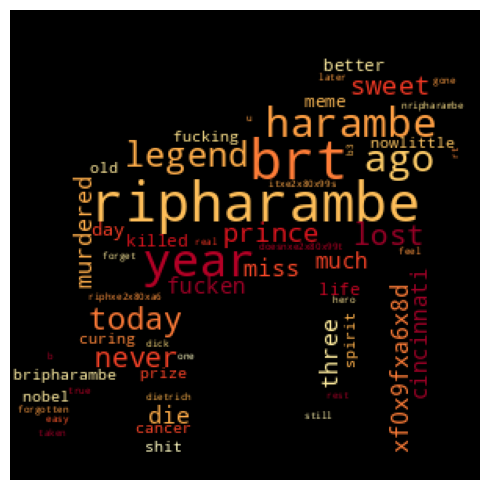

In [38]:
celanAndPlot(sentenceWednesday)

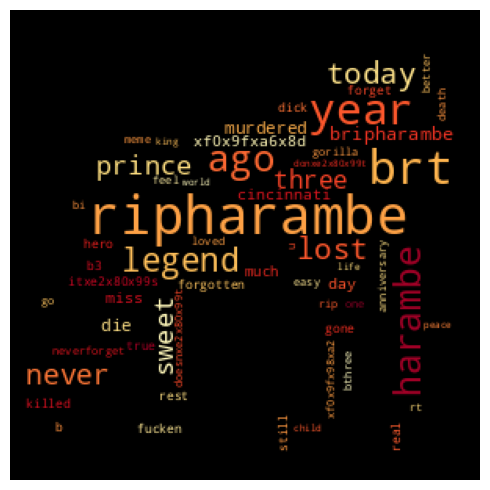

In [43]:
celanAndPlot(sentenceTuesday)